<h3>Data Pre-processing and Cleaning</h3>

In [2]:
#Getting data
import pandas as pd
import numpy as np

In [3]:
Data=pd.read_csv(r"Fraud.csv")
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
Data=Data.drop_duplicates()

In [5]:
Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
Data.isnull().any(axis=1)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

<h3>Features That can be seen as crucial for our model</h3>

In [8]:
Data[Data["isFlaggedFraud"]==1].shape[0]

16

In [9]:
Data["isFraud"].sum()
df1=Data[Data["isFraud"]==1]
print(df1.shape[0])
flagged_fraud_sum = df1[df1["isFlaggedFraud"] == 1].shape[0]
print(flagged_fraud_sum)
#only 16 cases of actual fraud are detected by the system as of now which matches our above observation

8213
16


In [10]:
pattern_match = df1[(df1['amount'] == df1['oldbalanceOrg']) & (df1['newbalanceOrig'] == 0.0)]
print(pattern_match.shape[0])
pattern_match
#8213-8024=16, which means the condition of amount>200000 is only detecting 16 cases of fraud.
#Rest of the cases follow a different pattern as shown in pattern_match, the scammer is emptying the account balance for most accounts.

8024


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [11]:
df1['type'].unique()
#fraudulant activities have occured with transactions of type 'Transfer' and 'Cash-out'.
#This doesn't mean that all 'Transfer' and 'Cash-out' transactions are fraud. 
#But all the transactions that are fraud, transaction type is 'Transfer' or 'Cash-out'

array(['TRANSFER', 'CASH_OUT'], dtype=object)

<h3>Outlier Detection</h3>

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

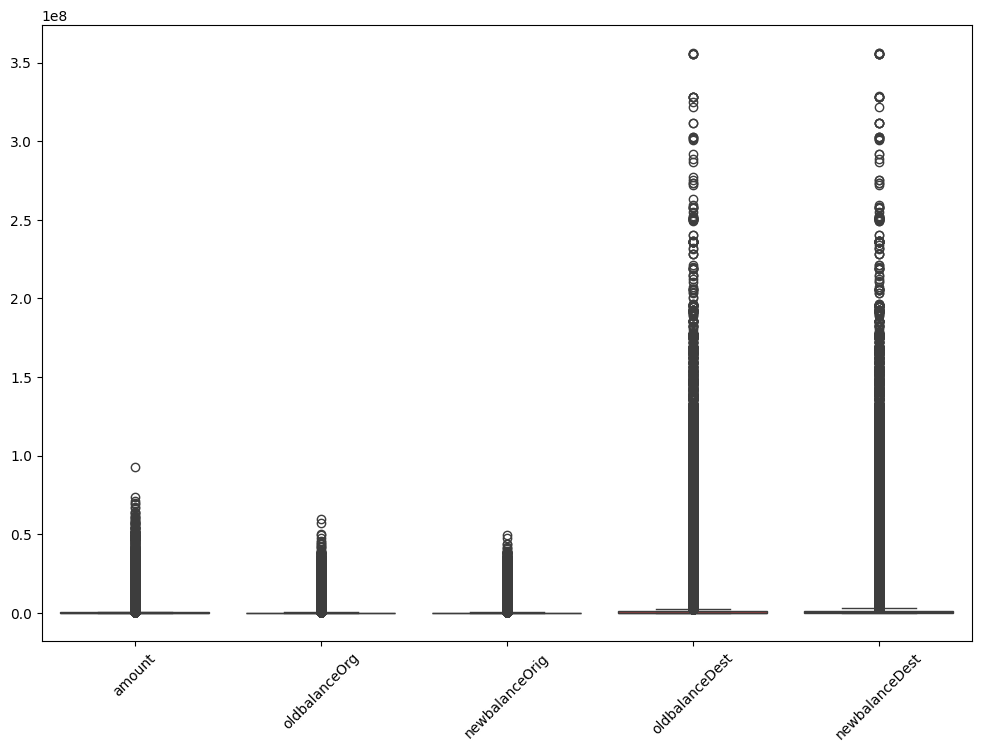

In [13]:
#before standardizing the skewness of the data
plt.figure(figsize=(12, 8))
sns.boxplot(data=Data[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
plt.xticks(rotation=45)
plt.show()

<h3>Check For Multi-Collinearity</h3>

In [14]:
Data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [15]:
Data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
Data = pd.get_dummies(Data, columns=['type'])
print(Data.head())


   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0         False   
1             0.0             0.0        0               0         False   
2             0.0             0.0        1               0         False   
3         21182.0             0.0        1               0         False   
4             0.0             0.0        0               0         False   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0          Fal

In [17]:
Data = Data.drop(['nameOrig', 'nameDest'], axis=1)

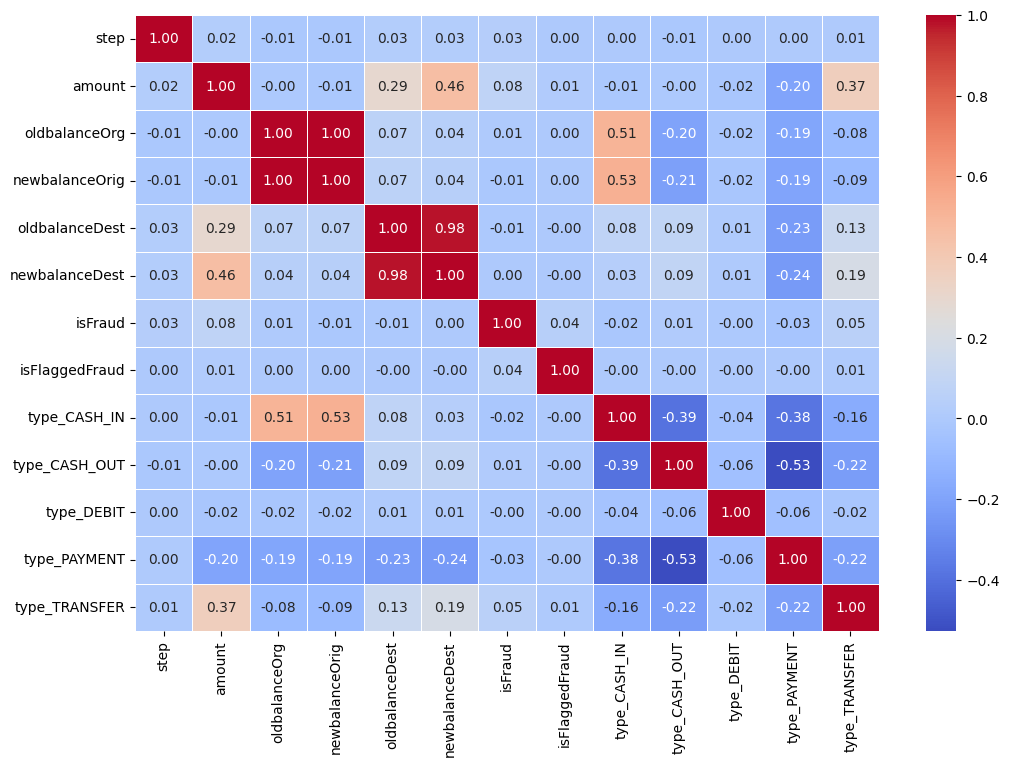

In [18]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [19]:
# Create new features based on balance changes
Data['balance_change'] = Data['oldbalanceOrg'] - Data['newbalanceOrig']
Data['dest_balance_change'] = Data['oldbalanceDest'] - Data['newbalanceDest']
# Drop redundant or irrelevant columns
Data.drop(['step', 'newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)
# Drop original balance columns after feature creation
Data.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1, inplace=True)

In [20]:
# High Amount Pattern
Data['high_amount'] = (Data['amount'] > 200000)
# Balance Match Pattern
Data['balance_match'] = (Data['balance_change'] == Data['amount'])
# Keep ALL transaction types
Data['transfer_or_cashout'] = ((Data['type_TRANSFER'] == 1) | (Data['type_CASH_OUT'] == 1))
Data

,amount,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,balance_change,dest_balance_change,high_amount,balance_match,transfer_or_cashout
0,9839.64,0,0,False,False,False,True,False,9839.64,0.00,False,False,False
1,1864.28,0,0,False,False,False,True,False,1864.28,0.00,False,False,False
2,181.00,1,0,False,False,False,False,True,181.00,0.00,False,True,True
3,181.00,1,0,False,True,False,False,False,181.00,21182.00,False,True,True
4,11668.14,0,0,False,False,False,True,False,11668.14,0.00,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,1,0,False,True,False,False,False,339682.13,-339682.13,True,True,True
6362616,6311409.28,1,0,False,False,False,False,True,6311409.28,0.00,True,True,True
6362617,6311409.28,1,0,False,True,False,False,False,6311409.28,-6311409.27,True,True,True
6362618,850002.52,1,0,False,False,False,False,True,850002.52,0.00,True,True,True


<h3> Tree-Based Model Training </h3>

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
features = ['amount', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'type_CASH_IN',
            'balance_change', 'dest_balance_change', 'high_amount', 'balance_match', 'transfer_or_cashout']
target = 'isFraud'

X = Data[features]
y = Data[target]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=50, max_depth=10,n_jobs=-1, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [24]:
y_pred = model.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('Accuracy:', accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.98      0.71      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.99      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270884      20]
 [    466    1154]]
Accuracy: 0.9996180818593599


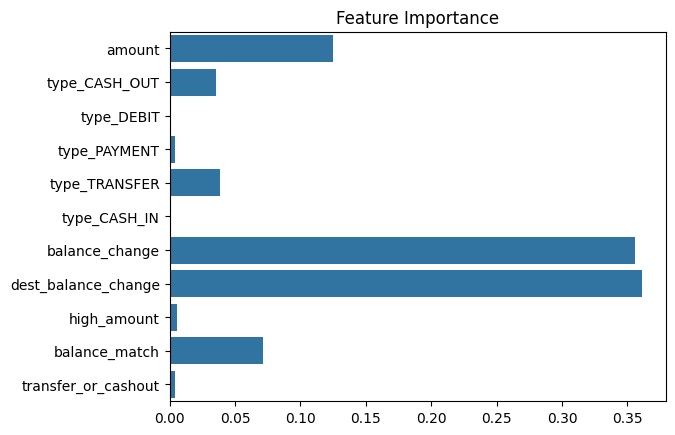

In [25]:

feature_importance = model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.show()


In [26]:
sample = X_test.sample(5, random_state=42)
sample

,amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,type_CASH_IN,balance_change,dest_balance_change,high_amount,balance_match,transfer_or_cashout
4237889,18275.06,True,False,False,False,False,18275.06,-18275.06,False,True,True
5507835,175843.75,False,False,False,False,True,-175843.75,175843.75,False,False,False
1678833,256162.91,True,False,False,False,False,166762.00,-256162.91,True,False,True
1143337,398329.16,True,False,False,False,False,215826.00,-398329.15,True,False,True
5227515,14135.07,False,False,True,False,False,14135.07,0.00,False,True,False


In [27]:
predictions = model.predict(sample)
print("Predicted Fraud Status:", predictions)

Predicted Fraud Status: [0 0 0 0 0]


In [28]:
probs = model.predict_proba(sample)[:, 1]
print("Prediction Probability for Fraud:", probs)


Prediction Probability for Fraud: [1.02143414e-02 0.00000000e+00 2.34125649e-05 4.38349753e-06
 4.53656185e-07]


In [29]:
sample['actual_fraud'] = y_test.loc[sample.index]
sample['predicted_fraud'] = predictions
sample['fraud_probability'] = probs
print(sample[['actual_fraud', 'predicted_fraud', 'fraud_probability']])


         actual_fraud  predicted_fraud  fraud_probability
4237889             0                0       1.021434e-02
5507835             0                0       0.000000e+00
1678833             0                0       2.341256e-05
1143337             0                0       4.383498e-06
5227515             0                0       4.536562e-07
